## Week 4: The Age Distribution of Cancer Incidence -
## Continuous Distributions Based on the Poisson Process

References:

Belikov, A. V., Vyatkin, A., & Leonov, S. V. (2021). The Erlang distribution approximates the age distribution of incidence of childhood and young adulthood cancers. PeerJ, 9, e11976. https://doi.org/10.7717/peerj.11976

Maslov, S. & Jensen, P. (2017).  BIOE-582, Statistics and Algorithms in Genomic Biology; Lecture 11: Poisson Process Continuous Probability Distributions [PPT Slides]. Department of Bioengineering, University of Illinois at Urbana-Champaign. https://courses.engr.illinois.edu/bioe582/fa2017/Lecture_11_Poisson_Process_Exponential_Erlang_Gamma_Distributions.pdf

In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive')
!ls

Mounted at /content/drive
MyDrive


### Continuous Probability Distributions: Exponential, Erlang & Gamma

#### **Related: The Poisson Process**

A series of discrete events happen over a period of time (t), at a rate defined by the variable lambda (λ).  The actual # of events (Nx) is a Poisson-distributed discrete random variable with mean λx:

PN(Nx=n)=exp(-λx)(λx)n/n!     E(Nx)= λx

#### **Why a Discrete Poisson Distribution?**  
- First, divide time into many tiny intervals of length x(0) << 1/λ
- The probability of an event per interval is small: p = λ∙Δx << 1,
- While the number of intervals is large: L= x/ Δx >> 1,
- And the mean is constant: E(Nx)=p ∙ L= (λΔx) ∙(x/Δx) = λ∙x
- P(Nx=n)=L!/n!(L-n)! p^n (1-p)^L-n
- In the limit p -> 0, L -> ∞: Binomial distribution -> Poisson

#### **What is the distribution of the interval X between consecutive events of a constant rate (Poisson) process?**

- Where X is a continuous random variable, the CCDF (Cumulative Distribution Function (1)): Prob(X>x) = Prob(NX=0) = exp(-λx).
- And, the PDF (2): f(x)=-d CCDF(x)/dx = λexp(-λx)
- We started with a discrete Poisson distribution where time, x was a parameter and Nx was the # of events (a discrete random variable)
- We ended up with a **continuous exponential distribution** where time X between events was a **continuous random variable**

#### **The mean and variance of the Exponential and Poisson distributions**

If the random variable X has an exponential distribution with parameter λ:

- mean μ = E(X) = 1/λ
- variance σ^2 = V(X) = 1/λ^2

For the Poisson distribution, mean μ = variance σ^2

For the Exponential distribution, mean μ = standard deviation σ

The continuous Exponential probability distribution is a continuous generalization of the discrete Geometric probability distribution.

The Exponential distribution and its variants are used in a variety of real-life models, including:

- The probability of component failure
- Likelihood of medical device failure
- Wait time predictions

#### **Exponential Variants: the Erlang & Gamma distributions**

##### *The Erlang Distribution*
The Erlang distribution is a generalization of the Exponential distribution where the Exponential distribution models the continuous time interval to the 1st event, and the Erlang distribution models the continuous time interval to the rth event - a sum of r exponentially-distributed variables!

The Erlang distribution is a continuous generalization of the discrete Negative Binomial distribution.

###### *The Gamma Distribution*
The gamma function is the generalization of the factorial function for r > 0, not just non-negative integers.

Γ(r) = ∫0->∞ x^r-1 . e^-x dx for r > 0

###### *Properties of the Gamma Distribution:*
- Recursive property: Γ(r) = (r-1) . Γ(r-1)
- Factorial function: Γ(r) = (r-1)!
- Therefore: Γ(1) = 0! = 1
- Interesting derivations:
  - Γ(1/2) = π^1/2 = 1.77
  - Γ(3/2) = 1/2Γ(1/2) = 0.89
  - 1/2! = √π/2


(1) For more on Cumulative Distribution Functions: https://statisticsbyjim.com/graphs/empirical-cumulative-distribution-function-cdf-plots/

(2) For more on the Probability Density Function: https://statisticsbyjim.com/probability/probability-density-function/

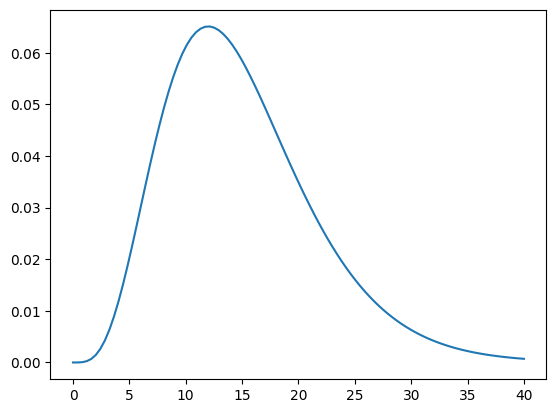

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#define x-axis values
x = np.linspace (0, 40, 100)

#calculate pdf of Erlang distribution for each x-value
y = stats.erlang.pdf(x, a=5, scale=3)

#create plot of Gamma distribution
plt.plot(x, y)

#display plot
plt.show()

Above: A simple plot of an Erlang Distribution with scale (1/λ) = 3

### Gamma, Erlang, Exponential & Poisson

The Poisson distribution is used to model the probability of a specific number of events occurring within a fixed time interval.

The exponential distribution is for modeling the wait time until a *first* event.

The gamma and erlang distributions? For modeling the wait time until the *k-th* event.

So, if we would use Poisson regression to predict the # of customers who will buy something today, we would use an exponential model to predict the amount of time before the first customer buys, and a gamma or erlang model to predict the amount of time before the k-th customer buys.

In healthcare, the Erlang and Gamma distributions are often useful for:

- Cost modeling (avg. dollars spent per beneficiary)
- Modeling the length of stay
- Modeling absenteeism
- Modeling wait times to procedure / operation
- Modeling wait times to discharge
- Modeling the time to disease

### Parameters

The Gamma and Erlang distributions have three parameters: the shape (k or a > 0), the scale (theta or θ), and the rate (beta or β) which is equal to 1/θ.

### How do I know if my data is Erlang or Gamma distributed?

We can't know the distribution of data just by looking at it.  We might often believe some data is normally distributed (or close enough) by looking at a histogram, but we could be wrong!  That's the reason for Tests of Normality*.  It is best to **test** the distribution of the outcome variable (unless of course it is binary, then we know the outcome distribution is Binomial).

*More on Tests of Normality:

https://statisticsbyjim.com/basics/assessing-normality-histograms-probability-plots/

https://journals.tubitak.gov.tr/medical/vol36/iss3/7/

## Belikov, Vyatkin, & Leonov: The Erlang distribution approximates the age distribution of incidence of childhood and young adulthood cancers

In their August 6, 2021 publication, three scientists from the Laboratory of Innovative Medicine, School of Biological and Medical Physics, Moscow Institute of Physics and Technology, Moscow, Russia, used the CDC WONDER data to show that the Erlang distribution is the only classical probability distribution that can adequately model the age distribution of incidence for all
studied childhood and young adulthood cancers, in addition to cancers of old age.

To determine this, Belikov & Vyatkin created python code that tested the data for conformance to many distributions.  In their documentation, they state that it took 6 hours for this distribution-fitting code to run on a typical CPU!

https://pubmed.ncbi.nlm.nih.gov/34434669/

https://github.com/belikov-av/childhoodcancers

In [10]:
import pandas as pd

cancer_ds = pd.read_excel('MyDrive/Using Statistics in Medicine/Instructor Shared Folder/data/Childhood Incidence Data.xlsx', engine="openpyxl")
cancer_ds.head()

,"Age, years",Ewing tumor,Extracranial & extragonadal germ cell 1,Extracranial & extragonadal germ cell 2,Hepatoblastoma,Intracranial & intraspinal embryonal,Intracranial & intraspinal germ cell,Malignant gonadal germ cell,Nephroblastoma,Neuroblastoma,Retinoblastoma
0,0.5,0.290000,12.640000,NaN,10.790000,11.190000,NaN,NaN,16.070000,58.490000,28.380000
1,3.0,0.979996,1.489990,NaN,4.880005,10.830080,0.250000,NaN,19.919920,21.470210,8.579956
2,7.5,2.169983,0.130001,0.130001,0.330002,7.479980,1.100006,1.08,5.099976,3.469971,0.470001
3,12.5,4.250000,NaN,0.330002,0.180000,4.239990,2.520020,3.62,0.699997,1.049988,NaN
4,17.5,4.290039,NaN,1.709991,NaN,2.869995,2.289978,21.53,0.349998,0.410004,NaN


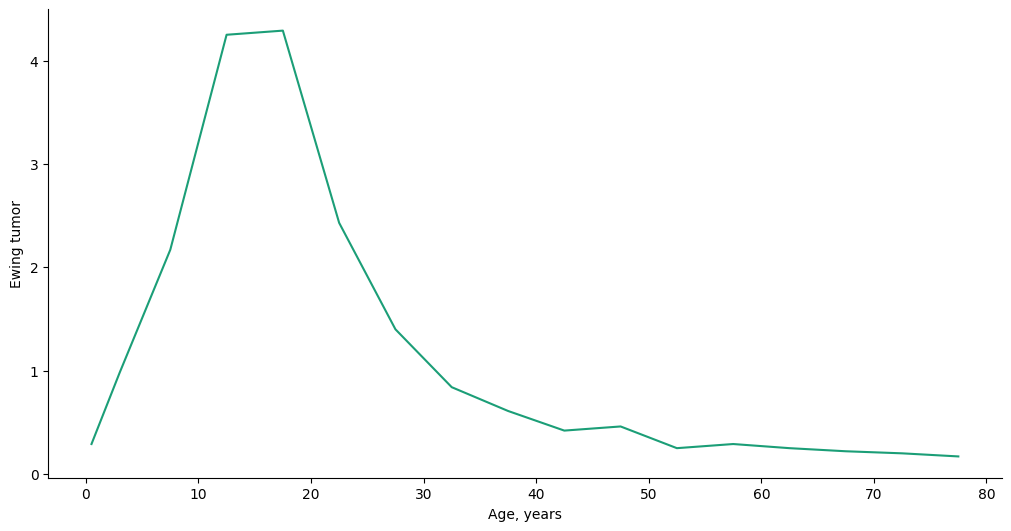

In [12]:
# @title Age, years vs Ewing tumor

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Age, years']
  ys = series['Ewing tumor']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cancer_ds.sort_values('Age, years', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Age, years')
_ = plt.ylabel('Ewing tumor')

Fitted Erlang Distribution Over Age, Years vs. Ewing Tumor

Using the k and theta values from the paper: 4.3 & 4.25

The plot is scaled so the distribution curve will align with the data's original y-values.

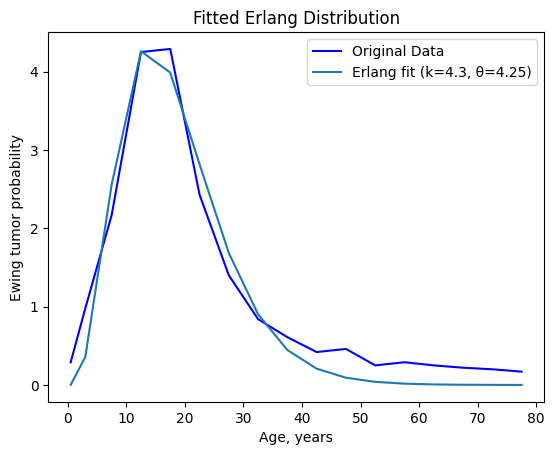

In [200]:
from scipy.stats import gamma
import numpy as np
from matplotlib import pyplot as plt

x_values = cancer_ds['Age, years']
y_values = cancer_ds['Ewing tumor']

y_values_clean = y_values[np.isfinite(y_values)]
x_values_clean = x_values[np.isfinite(y_values)]

k = 4.3  # Shape parameter (k=1 for Erlang is an exponential distribution)
theta = 4.25  # Scale parameter

# Now we generate y-values for the Erlang distribution
# Since k=1, this is essentially an exponential distribution
y_erlang = gamma.pdf(x_values_clean, a=k, scale=theta)

# Plot the original data
plt.plot(x_values_clean, y_values_clean, 'b-', label='Original Data')

# Overlay the fitted Erlang distribution
plt.plot(x_values_clean, y_erlang*np.mean(x_values_clean)*2.29, label=f'Erlang fit (k={k}, θ={theta})')

# Adjust the plot as needed
plt.title('Fitted Erlang Distribution')
plt.xlabel('Age, years')
plt.ylabel('Ewing tumor probability')
plt.legend()
plt.show()